# Time Series Decomposition
Feb 21st 2021

In [33]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
# Config:
pd.options.display.float_format = '{:,.2f}'.format
plotsize = (13, 5)
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plt.rcParams['figure.figsize']= plotsize
SEED=10

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_1/2_time_series_decomposition


### Additive decomposition

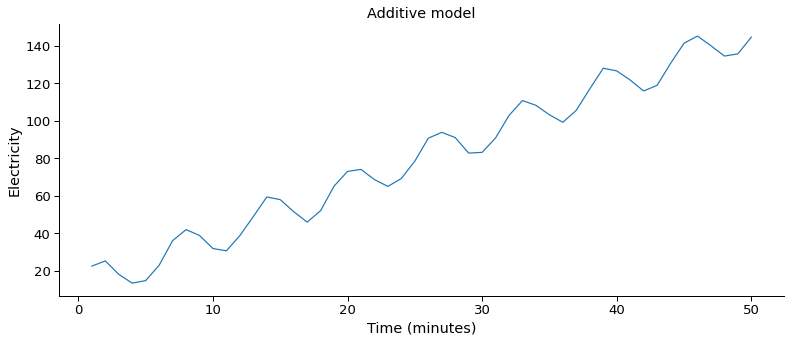

In [5]:
time= np.arange(1,51)
trend= time * 2.75
seasonal= 10+np.sin(time)*10
np.random.seed(SEED)
residual= np.random.normal(loc= 0.0, scale= 1, size= len(time)) #mean= 0, and sd= 1

# Additive model:
additive= trend + seasonal + residual

# Plot:
plt.plot(time, additive)
plt.title('Additive model')
plt.xlabel('Time (minutes)')
plt.ylabel('Electricity')
plt.show()

In [10]:
ss_decomposition= seasonal_decompose(x= additive, model= "additive", period= 6)
estimated_trend= ss_decomposition.trend
estimated_seasonal= ss_decomposition.seasonal
estimated_residual= ss_decomposition.resid

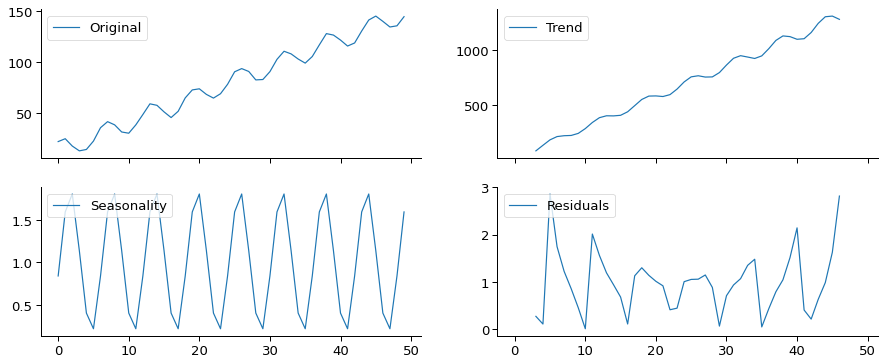

In [63]:
fig, axes= plt.subplots(2,2, sharex= True)
fig.set_figheight(6)
fig.set_figwidth(15)

axes[0,0].plot(additive, label= "Original")
axes[0,0].legend(loc= 'upper left')

axes[0,1].plot(estimated_trend, label= "Trend")
axes[0,1].legend(loc= "upper left")

axes[1,0].plot(estimated_seasonal, label= "Seasonality")
axes[1,0].legend(loc= 'upper left')

axes[1,1].plot(estimated_residual, label= "Residuals")
axes[1,1].legend(loc= "upper left")

plt.show()

### Multiplicative Decomposition

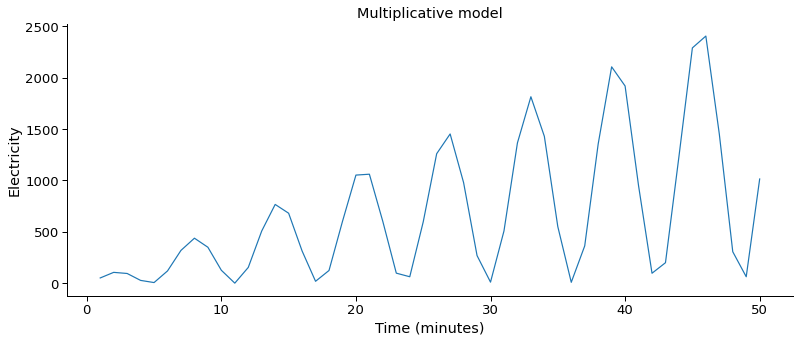

In [25]:
ignore_residuals= np.ones_like(residual)
multiplicative= trend * seasonal * ignore_residuals
plt.plot(time, multiplicative)
plt.title('Multiplicative model')
plt.xlabel('Time (minutes)')
plt.ylabel('Electricity')
plt.show()

In [27]:
ss_decompsition= seasonal_decompose(x= multiplicative, model= "multiplicative", period= 6)
estimated_trend= ss_decompsition.trend
estimated_seasonal= ss_decompsition.seasonal
estimated_residual= ss_decompsition.resid

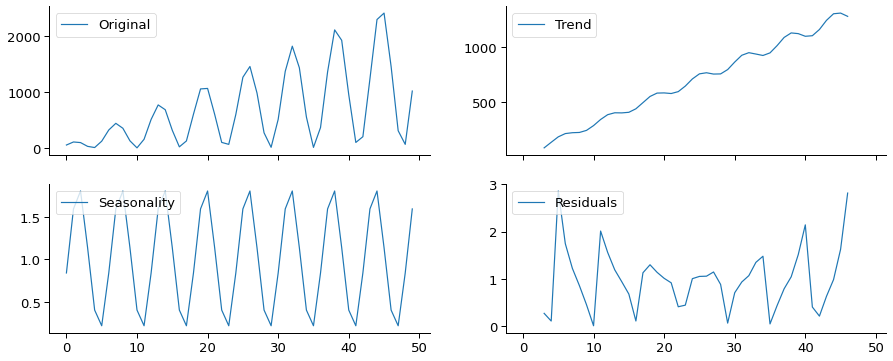

In [62]:
fig, axes= plt.subplots(2,2, sharex= True)
fig.set_figheight(6)
fig.set_figwidth(15)

axes[0,0].plot(multiplicative, label= "Original")
axes[0,0].legend(loc= 'upper left')

axes[0,1].plot(estimated_trend, label= "Trend")
axes[0,1].legend(loc= "upper left")

axes[1,0].plot(estimated_seasonal, label= "Seasonality")
axes[1,0].legend(loc= 'upper left')

axes[1,1].plot(estimated_residual, label= "Residuals")
axes[1,1].legend(loc= "upper left")

plt.show()

## Exercises

In [47]:
time= np.arange(0, 50)

data_path= '../course_data/2_time_series-decomposition-material/'
data_a= np.load(data_path+"dataset_A.npy")
data_b= np.load(data_path+"dataset_B.npy")

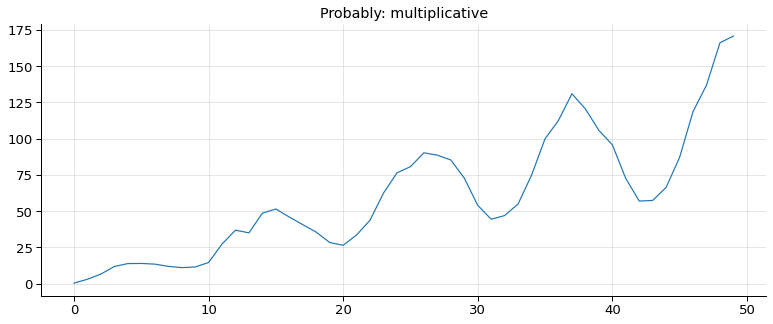

In [54]:
plt.plot(data_a)
plt.title("Probably: multiplicative")
plt.grid(alpha= 0.4)
plt.show()

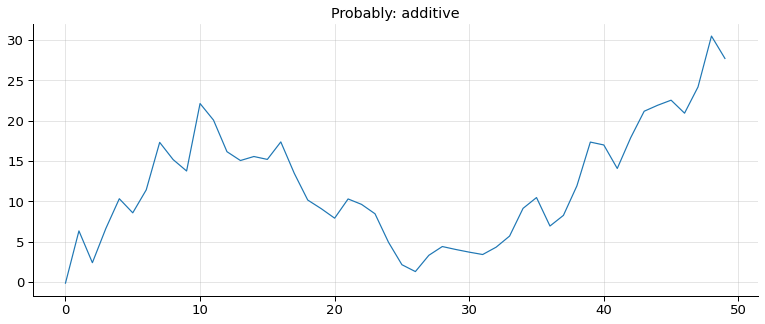

In [67]:
plt.plot(time, data_b)
plt.title("Probably: additive")
plt.grid(alpha= 0.4)
plt.show()

### Decompose Dataset A & B

In [74]:
ss_decomposition_multi= seasonal_decompose(x= data_a, model= "multiplicative", period= 11)

estimated_trend_multi = ss_decomposition_multi.trend
estimated_seasonal_multi = ss_decomposition_multi.seasonal
estimated_residual_multi = ss_decomposition_multi.resid

ss_decomposition_add = seasonal_decompose(x=data_b, model='additive', period=3)

estimated_trend_add = ss_decomposition_add.trend
estimated_seasonal_add = ss_decomposition_add.seasonal
estimated_residual_add = ss_decomposition_add.resid

Dataset A

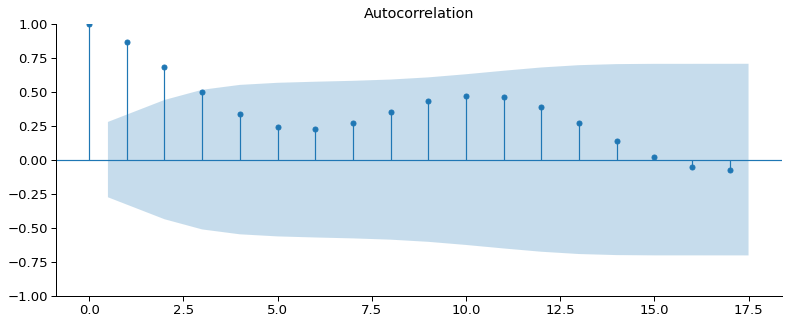

In [75]:
acf_a= plot_acf(data_a)

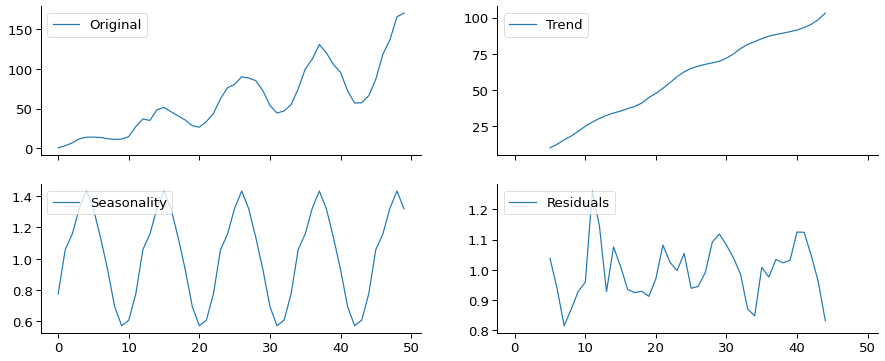

In [76]:
fig, axes= plt.subplots(2,2, sharex= True, sharey= False)
fig.set_figheight(6)
fig.set_figwidth(15)

axes[0,0].plot(data_a, label= "Original")
axes[0,0].legend(loc= "upper left")

axes[0,1].plot(estimated_trend_multi, label= "Trend")
axes[0,1].legend(loc= "upper left")

axes[1,0].plot(estimated_seasonal_multi, label='Seasonality')
axes[1,0].legend(loc='upper left')

axes[1,1].plot(estimated_residual_multi, label='Residuals')
axes[1,1].legend(loc='upper left')

plt.show()

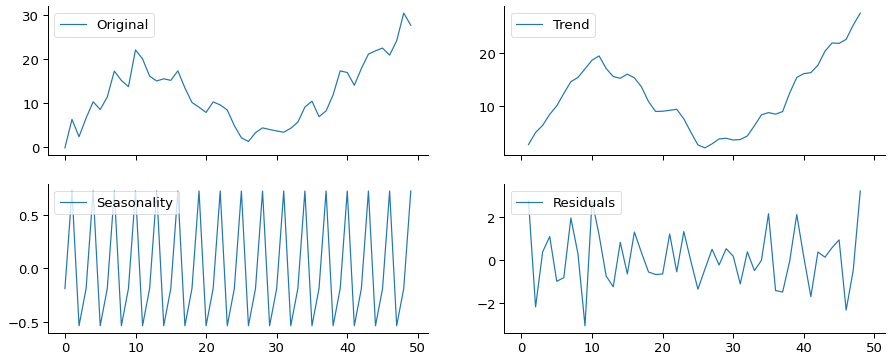

In [85]:
fig, axes= plt.subplots(2,2, sharex= True, sharey= False)
fig.set_figheight(6)
fig.set_figwidth(15)

axes[0,0].plot(data_b, label= "Original")
axes[0,0].legend(loc= "upper left")

axes[0,1].plot(estimated_trend_add, label= "Trend")
axes[0,1].legend(loc= "upper left")

axes[1,0].plot(estimated_seasonal_add, label= "Seasonality")
axes[1,0].legend(loc= "upper left")

axes[1,1].plot(estimated_residual_add, label= "Residuals")
axes[1,1].legend(loc= "upper left")

plt.show()